In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# NNAntisparse

In [3]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV1.pkl")

In [4]:
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results
# table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [5]:
# df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax2') & (df_nnanti_results['rho'] == 0.8)]['SINR'].hist()

In [6]:
# df_nnanti_results.loc[df_nnanti_results['SINR'] == -999]

In [7]:
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results

In [8]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRNSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)

# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'NSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [3]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.iloc[-20:]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [4]:
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,NSM,ICA,LDMI,PMF
0,0.0,27.244685,27.871744,28.165488,29.542237,23.838138,31.393648,29.839121
1,0.1,27.502785,27.967012,28.172274,23.140114,19.949051,31.372895,29.950132
2,0.2,27.486791,27.884511,27.885992,17.568544,15.730983,31.521691,29.732986
3,0.3,27.322740,27.598665,27.469186,13.714490,12.771990,31.453127,29.592594
4,0.4,27.581375,27.589904,27.522128,10.876288,10.530696,31.975688,30.025220
5,0.5,27.032967,26.826423,26.417667,8.194453,8.563726,31.661239,29.497131
6,0.6,26.492704,25.991164,25.302152,5.700218,6.825230,31.538139,29.453701
7,0.7,25.205596,23.914650,22.651065,4.359822,3.698915,31.455187,29.206181
8,0.8,20.803054,19.144516,17.670144,2.959925,3.995689,30.189740,28.046089


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


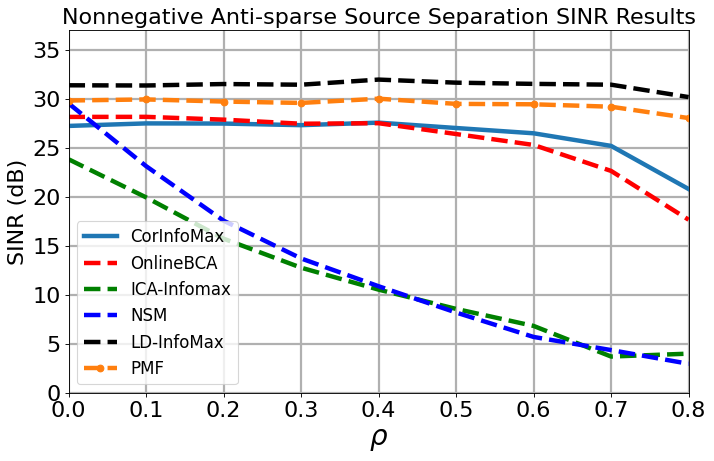

In [5]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxNNAntisparse_Correlated.pdf', format='pdf')

<AxesSubplot:>

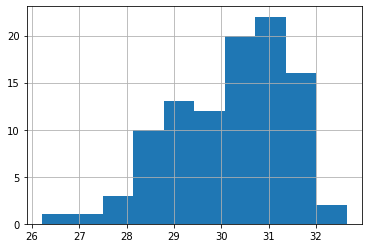

In [19]:
df_nnanti_results.loc[(df_nnanti_results['Model']=='LDMI') & (df_nnanti_results['rho']==0.8)]['SINR'].hist()

In [12]:
results.loc[results['Model'] == 'CorInfoMax']

,Model,rho,count,SINR
0,CorInfoMax,0.0,100,27.244685
1,CorInfoMax,0.1,100,27.502785
2,CorInfoMax,0.2,100,27.486791
3,CorInfoMax,0.3,100,27.322740
4,CorInfoMax,0.4,100,27.581375
5,CorInfoMax,0.5,100,27.032967
6,CorInfoMax,0.6,100,26.492704
7,CorInfoMax,0.7,100,25.205596
8,CorInfoMax,0.8,100,20.803054


In [3]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")#.iloc[:int(9*7*100)]
# print('Shape : {}'.format(df_nnanti_results.shape))
# # print('Number of diverge cases for CorInfoMax is : ')
# # print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# # df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

In [4]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV4.pkl")#.iloc[:int(9*7*100)]
# print('Shape : {}'.format(df_nnanti_results.shape))
# # print('Number of diverge cases for CorInfoMax is : ')
# # print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# # df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

In [5]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV5.pkl")#.iloc[:int(9*7*100)]
# print('Shape : {}'.format(df_nnanti_results.shape))
# # print('Number of diverge cases for CorInfoMax is : ')
# # print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# # df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

In [3]:
df_nnanti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")[['Model','rho', 'SINR']]
df_nnanti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV4.pkl")[['Model','rho', 'SINR']]
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV5.pkl")[['Model','rho', 'SINR']]
df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2, df_nnanti_results3], axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (6544, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  4


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,NSM,ICA,LDMI,PMF
0,0.0,27.227426,27.781611,28.096011,24.058384,29.638680,23.922622,31.431806,29.920470
1,0.1,27.182660,27.725980,27.955520,23.543755,23.057649,19.767416,31.190220,29.542393
2,0.2,27.552520,27.879078,27.979836,23.750934,17.533363,15.755672,31.399042,29.810894
3,0.3,27.506078,27.743162,27.637385,24.153824,13.751071,12.783376,31.702163,29.700972
4,0.4,27.885675,27.685446,27.507982,23.204713,10.941945,10.533686,32.170718,30.091863
5,0.5,27.468885,27.044998,26.370770,22.486195,8.277279,8.579707,31.856925,29.731109
6,0.6,26.728134,25.814766,25.190879,21.681012,5.934841,6.816402,31.663370,29.569958
7,0.7,24.995005,23.626834,22.870919,21.188026,4.066840,3.583592,31.584675,29.063131
8,0.8,21.072277,18.767581,17.213624,18.451377,3.060247,3.983613,30.268116,28.056932


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


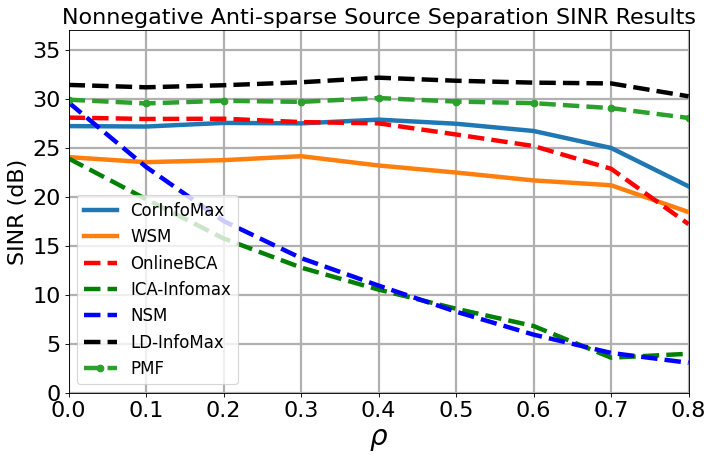

In [4]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [5]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,89,24.058384
64,WSM,0.1,91,23.543755
65,WSM,0.2,92,23.750934
66,WSM,0.3,92,24.153824
67,WSM,0.4,91,23.204713
68,WSM,0.5,90,22.486195
69,WSM,0.6,90,21.681012
70,WSM,0.7,90,21.188026
71,WSM,0.8,89,18.451377


In [13]:
# df_nnanti_results = pd.concat([df_nnanti_results3], axis = 0)
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()

# results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,21,24.116593
64,WSM,0.1,21,23.378204
65,WSM,0.2,21,23.879602
66,WSM,0.3,20,24.257210
67,WSM,0.4,20,22.949012
68,WSM,0.5,20,22.628364
69,WSM,0.6,20,22.715088
70,WSM,0.7,20,20.123833
71,WSM,0.8,20,19.329976


In [6]:
df_nnanti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV6.pkl")[['Model','rho', 'SINR']]
df_nnanti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV7.pkl")[['Model','rho', 'SINR']]
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV8.pkl")[['Model','rho', 'SINR']]
df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2, df_nnanti_results3], axis = 0)
# df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2], axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (7272, 13)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  1


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,NSM,ICA,LDMI,PMF
0,0.0,27.237386,27.888263,28.219358,24.088838,29.646316,23.920675,31.457875,29.910190
1,0.1,27.455646,27.993481,28.224780,23.841594,23.091752,19.932267,31.442456,29.936664
2,0.2,27.589513,27.943542,28.047207,24.084812,17.512705,15.761150,31.586103,29.890356
3,0.3,27.728737,27.922730,27.891794,24.105861,13.709542,12.822881,31.868820,30.002678
4,0.4,27.567777,27.433168,27.137081,23.552901,10.777046,10.500545,31.894656,29.765179
5,0.5,27.311022,27.182752,26.499832,23.151195,8.197990,8.577463,32.120565,29.717283
6,0.6,25.748190,25.424942,24.719953,21.942927,5.600301,6.819044,31.571185,29.210100
7,0.7,25.327150,24.174305,23.202219,20.097983,4.038107,3.680665,31.202979,29.036612
8,0.8,21.438772,19.004636,18.093436,18.646783,2.953141,4.000511,30.129976,28.149105


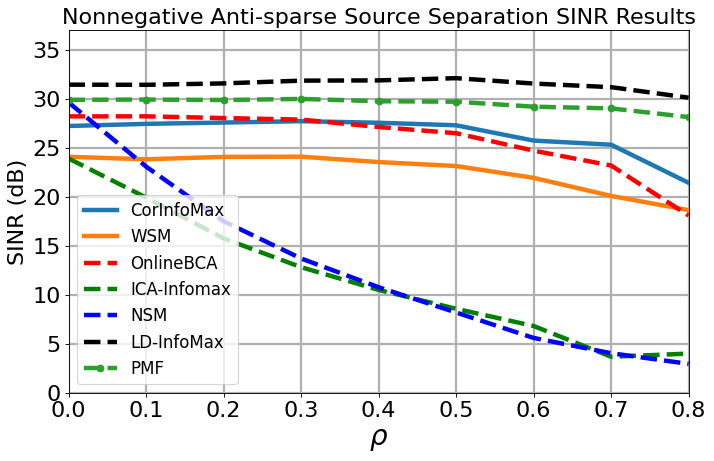

In [7]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [8]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,101,24.088838
64,WSM,0.1,101,23.841594
65,WSM,0.2,100,24.084812
66,WSM,0.3,101,24.105861
67,WSM,0.4,101,23.552901
68,WSM,0.5,101,23.151195
69,WSM,0.6,101,21.942927
70,WSM,0.7,101,20.097983
71,WSM,0.8,101,18.646783


In [107]:
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")[['Model','rho', 'SINR']]
df_nnanti_results4 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV4.pkl")[['Model','rho', 'SINR']]
df_nnanti_results5 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV5.pkl")[['Model','rho', 'SINR']]
df_nnanti_results6 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV6.pkl")[['Model','rho', 'SINR']]
df_nnanti_results7 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV7.pkl")[['Model','rho', 'SINR']]
df_nnanti_results8 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV8.pkl")[['Model','rho', 'SINR']]

df_nnanti_results = pd.concat([df_nnanti_results3,df_nnanti_results4, df_nnanti_results5,df_nnanti_results6,df_nnanti_results7, df_nnanti_results8], axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (14616, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  6


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,NSM,ICA,LDMI,PMF
0,0.0,27.216529,27.819175,28.139717,24.061889,29.620261,23.898624,31.417814,29.892276
1,0.1,27.358284,27.888509,28.114887,23.713513,23.096116,19.867699,31.363081,29.780823
2,0.2,27.559489,27.906141,28.009865,23.986901,17.527919,15.754210,31.489208,29.823232
3,0.3,27.550349,27.801911,27.741017,24.128554,13.716785,12.793796,31.729477,29.797581
4,0.4,27.706940,27.548586,27.316167,23.374345,10.836388,10.513406,31.998131,29.872688
5,0.5,27.373428,27.066209,26.469501,22.846151,8.223196,8.576745,31.973946,29.695887
6,0.6,26.207331,25.611252,24.846901,21.805779,5.757002,6.819944,31.619925,29.399346
7,0.7,25.107084,23.816124,22.963520,20.582485,4.062689,3.614040,31.334843,28.997756
8,0.8,21.215550,18.828874,17.627521,18.500152,2.999941,3.993752,30.194502,28.115434


In [4]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,199,24.061889
64,WSM,0.1,202,23.713513
65,WSM,0.2,202,23.986901
66,WSM,0.3,203,24.128554
67,WSM,0.4,203,23.374345
68,WSM,0.5,203,22.846151
69,WSM,0.6,202,21.797575
70,WSM,0.7,202,20.606592
71,WSM,0.8,202,18.513363


Shape : (7272, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  1


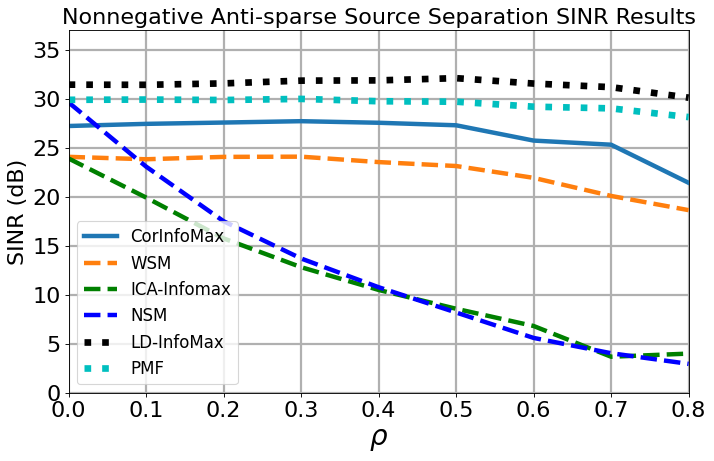

In [108]:
df_nnanti_results = pd.concat([
#                                df_nnanti_results3,
#                                df_nnanti_results4, 
#                                df_nnanti_results5,
                               df_nnanti_results6, 
                               df_nnanti_results7, 
                               df_nnanti_results8
                              ],
                              axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()

SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
# plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF, 'c:', linewidth=6, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxNNAntisparse_CorrelatedV2.pdf', format='pdf')

In [6]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,101,24.088838
64,WSM,0.1,101,23.841594
65,WSM,0.2,100,24.084812
66,WSM,0.3,101,24.105861
67,WSM,0.4,101,23.552901
68,WSM,0.5,101,23.151195
69,WSM,0.6,101,21.942927
70,WSM,0.7,101,20.097983
71,WSM,0.8,101,18.646783


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


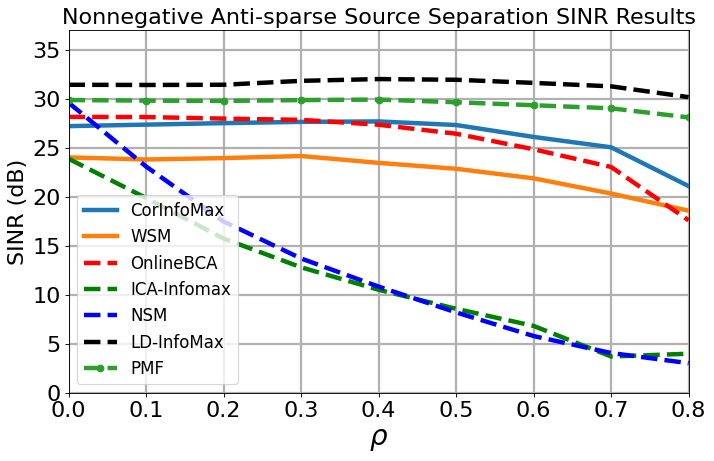

In [5]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [ ]:
# from general_utils import *
# from visualization_utils import *
# from polytope_utils import *
# from bss_utils import *

30.665558333937454


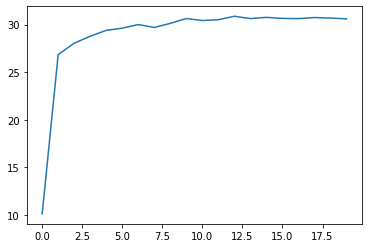

In [147]:
# rho = 0.0
# k = 0
# print(df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['SINR'])
# plt.plot(df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['SINRlist'])

In [109]:
# rho = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['rho']
# trial = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['trial']
# seed = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['seed']
# Wf = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['Wf']

In [110]:
# A = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['A']
# S = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['S']
# Xnoisy = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['X']
# X_WSM = (0.28 * (Xnoisy / Xnoisy.std(1)[:,np.newaxis]))
# np.linalg.norm(X - A @ S)

3588.2328337473987

In [112]:
# Y = Wf @ X_WSM
# Y_ = signed_and_permutation_corrected_sourcesV2(S, Y)
# SINR, SNR, _, _, _ = evaluate_bssV2(Wf, Y_, A, S, mean_normalize_estimations = False)
# SINR

16.444212176591503

# Antisparse

In [13]:
# df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV1.pkl")

In [14]:
# df_anti_results

In [15]:
# results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results.loc[results['Model'] == 'CorInfoMax2']

# table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [16]:
# df_anti_results.loc[df_anti_results['SINR'] == -999]

In [17]:
# results.loc[results['Model'] == 'OnlineBCA']

In [18]:
# results = df_anti_results.loc[df_anti_results['SINR'] != -999][['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

In [19]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRBSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'BSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [3]:
df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
df_anti_results = df_anti_results.loc[(df_anti_results['SINR'] != -999)]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [4]:
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,BSM,ICA,LDMI,PMF
0,0.0,24.709056,24.044864,25.668309,25.370583,29.643275,29.479405,29.510854
1,0.1,24.781422,24.103222,25.551283,18.724845,21.523834,29.651073,29.549875
2,0.2,24.697136,23.927696,25.141833,13.685154,16.348270,28.798253,29.262811
3,0.3,24.170905,23.167890,24.405175,10.353487,13.109831,28.259328,28.794440
4,0.4,23.632991,22.761455,23.601887,7.914876,10.715336,28.257939,28.614109
5,0.5,23.257116,22.877828,23.026719,5.811517,8.729421,25.787159,28.206243
6,0.6,23.285941,22.703955,22.392018,3.957891,6.961358,23.832697,28.014322
7,0.7,22.323396,22.204172,21.017993,2.164253,3.564699,16.810293,26.995702
8,0.8,21.421071,21.469299,19.603393,0.253840,4.015459,9.736812,25.576452


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


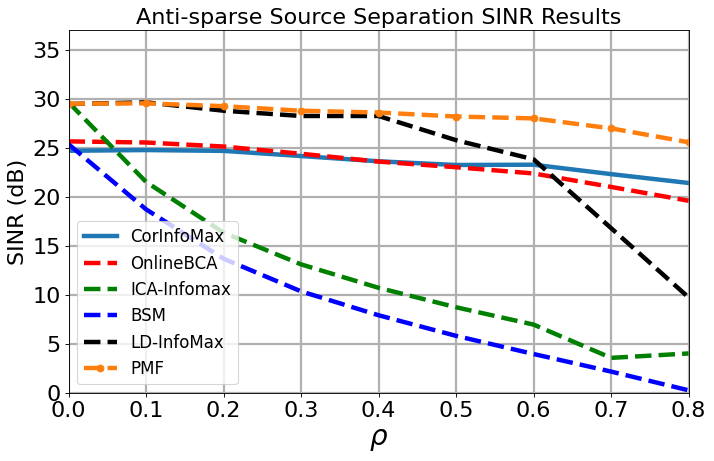

In [5]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
# plt.plot(rholist[:7],SINRLDMI[:7],'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxAntisparse_Correlated.pdf', format='pdf')

<AxesSubplot:>

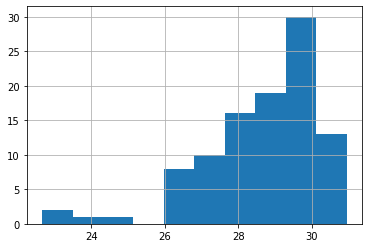

In [19]:
df_anti_results.loc[(df_anti_results['Model']=='PMF') & (df_anti_results['rho']==0.4)]['SINR'].hist()

<AxesSubplot:>

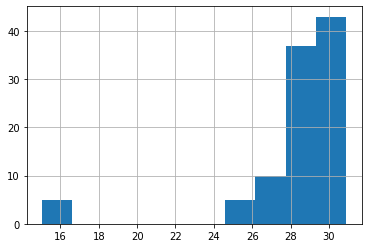

In [20]:
df_anti_results.loc[(df_anti_results['Model']=='LDMI') & (df_anti_results['rho']==0.4)]['SINR'].hist()

In [23]:
results.loc[results['Model'] == "LDMI"]

,Model,rho,count,SINR
36,LDMI,0.0,100,29.479405
37,LDMI,0.1,100,29.651073
38,LDMI,0.2,100,28.798253
39,LDMI,0.3,100,28.259328
40,LDMI,0.4,100,28.257939
41,LDMI,0.5,100,25.787159
42,LDMI,0.6,100,23.832697
43,LDMI,0.7,100,16.810293
44,LDMI,0.8,100,9.736812


In [3]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV3.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV4.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV5.pkl")[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
# df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2], axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (10800, 3)
Number of diverge cases for CorInfoMax is :  1
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,BSM,ICA,LDMI,PMF
0,0.0,25.650777,24.422180,26.593215,27.463862,26.023986,29.706037,29.944222,29.620394
1,0.1,25.692365,24.283627,26.473129,27.512354,21.561856,24.372612,29.870298,29.587530
2,0.2,25.974805,24.647642,26.470543,26.882809,17.002051,19.459185,29.830330,29.566880
3,0.3,25.308522,24.112398,25.800450,25.065310,13.577888,16.013538,29.438653,29.140777
4,0.4,25.190762,23.837958,25.410060,24.322469,10.911382,13.394582,28.764385,29.086223
5,0.5,24.529572,23.282326,24.825931,21.661736,8.669703,11.203238,27.884678,28.685272
6,0.6,24.444804,23.466636,24.057291,20.913552,6.610292,9.231350,25.832438,28.513164
7,0.7,23.135382,22.187615,22.638195,17.780624,4.612694,7.322846,21.004068,27.303967
8,0.8,22.471451,21.967126,20.941701,15.650610,2.483326,5.256184,13.481752,26.045532


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


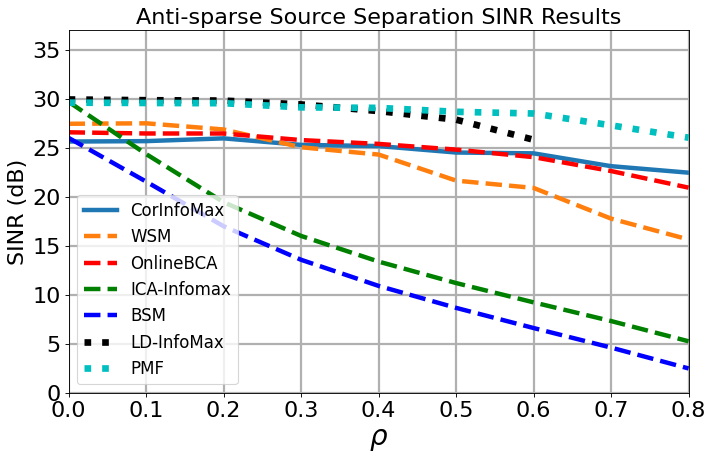

In [4]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [5]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,150,27.463862
64,WSM,0.1,150,27.512354
65,WSM,0.2,150,26.882809
66,WSM,0.3,150,25.065310
67,WSM,0.4,150,24.322469
68,WSM,0.5,150,21.661736
69,WSM,0.6,150,20.913552
70,WSM,0.7,150,17.780624
71,WSM,0.8,150,15.650610


In [21]:
results = df_anti_results1[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
results

,Model,rho,count,SINR
0,BSM,0.0,50,25.815115
1,BSM,0.1,50,21.680273
2,BSM,0.2,50,17.025582
3,BSM,0.3,50,13.639307
4,BSM,0.4,50,10.909903
...,...,...,...,...
67,WSM,0.4,50,24.501207
68,WSM,0.5,50,21.816065
69,WSM,0.6,50,20.151359
70,WSM,0.7,50,18.268141


In [22]:
results = df_anti_results2[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
results

,Model,rho,count,SINR
0,BSM,0.0,22,26.635497
1,BSM,0.1,22,21.645552
2,BSM,0.2,22,16.850790
3,BSM,0.3,22,13.461205
4,BSM,0.4,22,10.927062
...,...,...,...,...
67,WSM,0.4,22,24.732366
68,WSM,0.5,22,22.371765
69,WSM,0.6,22,21.057429
70,WSM,0.7,22,17.949971


In [23]:
results = df_anti_results3[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
results

,Model,rho,count,SINR
0,BSM,0.0,22,26.776076
1,BSM,0.1,22,21.496572
2,BSM,0.2,22,16.964452
3,BSM,0.3,22,13.449982
4,BSM,0.4,22,10.902183
...,...,...,...,...
67,WSM,0.4,22,24.189547
68,WSM,0.5,22,20.565980
69,WSM,0.6,22,22.263876
70,WSM,0.7,22,17.765188


In [10]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV6.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV7.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV8.pkl")[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
# df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2], axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (11466, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,WSM2,BSM,ICA,LDMI,PMF
0,0.0,24.508995,23.863202,25.487945,24.782898,24.964218,25.201299,29.372691,29.490995,29.251746
1,0.1,24.907721,24.338128,25.512917,24.218736,25.010513,18.781605,21.506574,29.408466,29.410249
2,0.2,24.713739,24.027147,25.220526,24.433505,24.003759,13.716063,16.355162,29.180645,29.263629
3,0.3,24.075741,23.632659,24.326417,22.241316,22.493946,10.365137,13.116299,28.564607,28.828235
4,0.4,23.901920,23.072801,23.793912,21.154140,21.255685,7.856077,10.715028,27.653517,28.480023
5,0.5,23.880729,23.738036,23.367217,20.253726,20.605249,5.806883,8.736830,26.903004,28.419523
6,0.6,22.962877,23.038102,22.207087,18.597487,18.662656,3.961152,6.958281,22.914576,27.812864
7,0.7,22.373578,21.979187,21.143096,16.936540,16.818854,2.151548,3.761357,16.064928,27.057369
8,0.8,21.212664,20.711724,19.227480,14.017131,14.005113,0.241474,3.998835,9.200661,25.779006


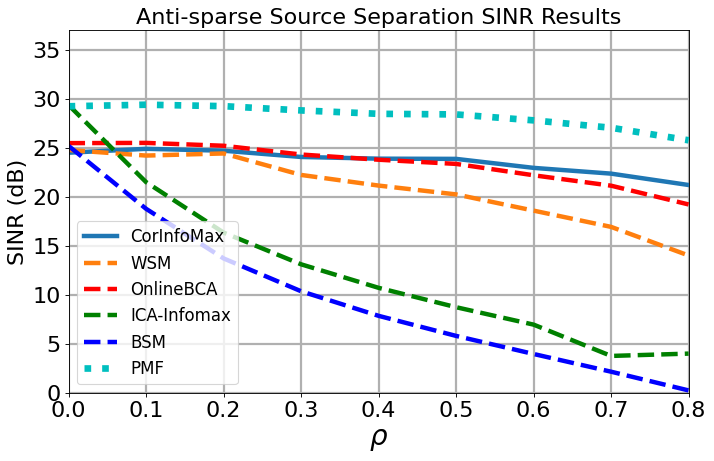

In [11]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRWSM2 = results.loc[results['Model'] == 'WSM2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRWSM2,'--', linewidth=4, label = "WSM2")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
# plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxAntisparse_CorrelatedV2.pdf', format='pdf')

In [12]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,142,24.782898
64,WSM,0.1,142,24.218736
65,WSM,0.2,142,24.433505
66,WSM,0.3,142,22.241316
67,WSM,0.4,142,21.154140
68,WSM,0.5,141,20.253726
69,WSM,0.6,141,18.597487
70,WSM,0.7,141,16.936540
71,WSM,0.8,141,14.017131


In [13]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV9.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV10.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV11.pkl")[['Model','rho', 'SINR']]
df_anti_results4 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV12.pkl")[['Model','rho', 'SINR']]

df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3, df_anti_results4], axis = 0)
# df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2], axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (16173, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,WSM2,BSM,ICA,LDMI,PMF
0,0.0,24.667232,23.965286,25.622968,25.165072,25.223352,25.223950,29.680974,29.517476,29.556185
1,0.1,24.718707,23.636543,25.307493,24.139482,24.669964,18.697831,21.479524,29.285925,29.279488
2,0.2,24.358184,23.479083,24.874099,22.854309,22.968318,13.648984,16.319390,28.962745,28.878172
3,0.3,24.301665,23.563814,24.596664,22.379366,22.665211,10.358921,13.124359,28.840426,29.010699
4,0.4,23.952053,23.581660,23.983778,21.732938,21.157752,7.864680,10.718909,27.814691,28.693039
5,0.5,23.570081,23.216759,23.038035,19.917848,20.221550,5.803745,8.732553,25.450975,28.299629
6,0.6,22.984712,22.499636,22.220336,18.773250,18.788103,3.949780,6.959905,21.956128,27.800958
7,0.7,22.523308,21.973714,21.131800,17.258844,17.025143,2.156154,3.852730,17.388790,27.133079
8,0.8,21.174026,21.283214,19.434032,13.997903,14.198015,0.258378,4.007555,9.695524,25.636442


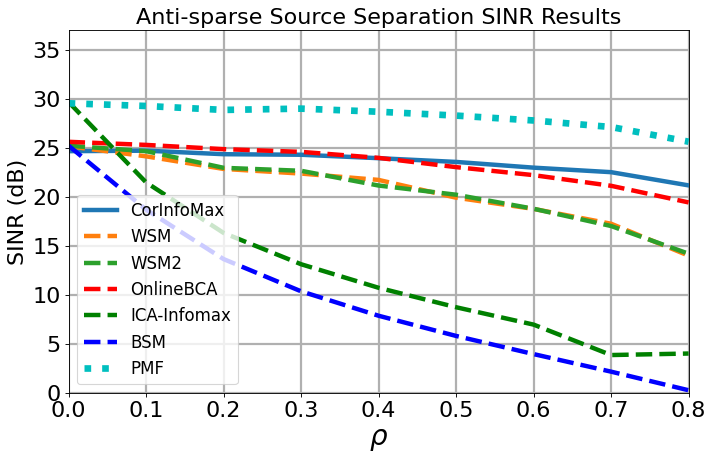

In [14]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRWSM2 = results.loc[results['Model'] == 'WSM2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
plt.plot(rholist,SINRWSM2,'--', linewidth=4, label = "WSM2")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
# plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [15]:
results.loc[results['Model'] == 'WSM2']

,Model,rho,count,SINR
72,WSM2,0.0,200,25.223352
73,WSM2,0.1,200,24.669964
74,WSM2,0.2,200,22.968318
75,WSM2,0.3,200,22.665211
76,WSM2,0.4,200,21.157752
77,WSM2,0.5,200,20.221550
78,WSM2,0.6,199,18.788103
79,WSM2,0.7,199,17.025143
80,WSM2,0.8,199,14.198015


In [124]:
df_anti_results = df_anti_results1.copy()
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,5,28.082676
64,WSM,0.1,5,21.261970
65,WSM,0.2,5,23.261844
66,WSM,0.3,4,25.838347
67,WSM,0.4,4,22.143481
68,WSM,0.5,4,22.525408
69,WSM,0.6,4,20.437133
70,WSM,0.7,4,14.945513
71,WSM,0.8,4,14.906895


<AxesSubplot:>

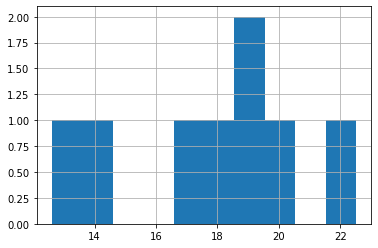

In [17]:
df_anti_results = df_anti_results4.copy()
df_anti_results.loc[(df_anti_results['Model'] == 'WSM') & (df_anti_results['rho'] == 0.6)]['SINR'].hist()

In [3]:
df_anti_results6 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV6.pkl")[['Model','rho', 'SINR']]
df_anti_results7 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV7.pkl")[['Model','rho', 'SINR']]
df_anti_results8 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV8.pkl")[['Model','rho', 'SINR']]
df_anti_results9 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV9.pkl")[['Model','rho', 'SINR']]
df_anti_results10 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV10.pkl")[['Model','rho', 'SINR']]
df_anti_results11 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV11.pkl")[['Model','rho', 'SINR']]
df_anti_results12 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV12.pkl")[['Model','rho', 'SINR']]

df_anti_results = pd.concat([
                               df_anti_results6, 
                               df_anti_results7, 
                               df_anti_results8,
                               df_anti_results9, 
                               df_anti_results10, 
                               df_anti_results11,
                               df_anti_results12, 
                              ],
                              axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (28287, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,WSM2,BSM,ICA,LDMI,PMF
0,0.0,24.581700,23.845640,25.542689,24.928272,25.062336,25.192596,29.530750,29.493247,29.407315
1,0.1,24.800262,23.931618,25.394056,24.138143,24.807940,18.732679,21.489355,29.339161,29.332055
2,0.2,24.528998,23.734695,25.036239,23.567735,23.442527,13.674006,16.335955,29.068612,29.055396
3,0.3,24.192115,23.550272,24.475147,22.328505,22.554014,10.362001,13.120443,28.650246,28.922131
4,0.4,23.949211,23.355822,23.912168,21.467883,21.199292,7.859859,10.717378,27.759657,28.597208
5,0.5,23.701756,23.446426,23.171362,20.055511,20.398186,5.803561,8.734264,26.062696,28.343050
6,0.6,22.982301,22.741885,22.215086,18.680780,18.728041,3.955501,6.958994,22.339676,27.795274
7,0.7,22.435739,21.913320,21.117850,17.094752,16.915345,2.152349,3.822561,16.844544,27.063704
8,0.8,21.182200,21.067606,19.358777,14.000889,14.085144,0.253378,4.004196,9.487633,25.681695


In [20]:
results.loc[results['Model'] == 'WSM2']

,Model,rho,count,SINR
72,WSM2,0.0,100,25.372120
73,WSM2,0.1,100,23.929214
74,WSM2,0.2,100,23.137919
75,WSM2,0.3,100,22.615980
76,WSM2,0.4,100,21.174475
77,WSM2,0.5,100,20.525296
78,WSM2,0.6,100,19.004570
79,WSM2,0.7,100,17.258572
80,WSM2,0.8,100,13.915143


In [16]:
results.loc[results['Model'] == 'CorInfoMax']

,Model,rho,count,SINR
9,CorInfoMax,0.0,100,24.703374
10,CorInfoMax,0.1,100,24.615702
11,CorInfoMax,0.2,100,24.396445
12,CorInfoMax,0.3,100,24.263590
13,CorInfoMax,0.4,100,23.878461
14,CorInfoMax,0.5,100,23.637664
15,CorInfoMax,0.6,100,23.082509
16,CorInfoMax,0.7,100,22.608213
17,CorInfoMax,0.8,100,21.056254


Shape : (8100, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


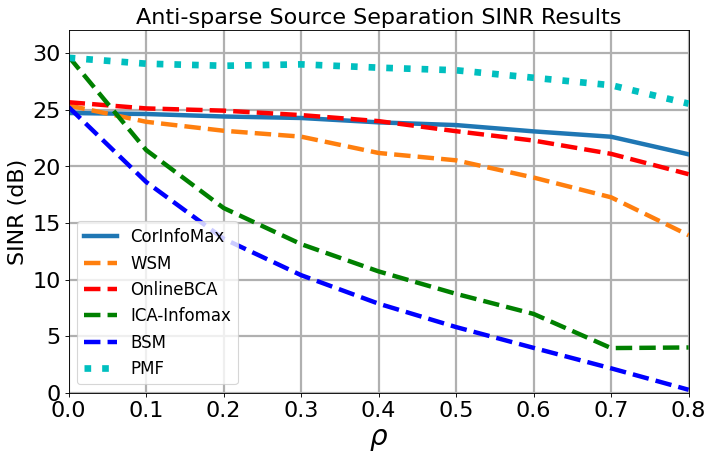

In [21]:
df_anti_results = pd.concat([
#                                df_anti_results6, 
#                                df_anti_results7, 
#                                df_anti_results8,
                               df_anti_results9, 
                               df_anti_results10, 
#                                df_anti_results11,
#                                df_anti_results12, 
                              ],
                              axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()


SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRWSM2 = results.loc[results['Model'] == 'WSM2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
plt.plot(rholist,SINRWSM2,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
# plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,32])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxAntisparse_CorrelatedV2.pdf', format='pdf')

In [13]:
from bss_utils import *

In [120]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV6.pkl")#[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV7.pkl")#[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV8.pkl")#[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
df_anti_results = df_anti_results.loc[(df_anti_results['Model'] == 'WSM') | ((df_anti_results['Model'] == 'CorInfoMax'))]

In [121]:
df_anti_results

,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
0,0.0,0,6661,CorInfoMax,25.246529,"[1.0366022559660313, 8.319427914128376, 8.3571...","[28.125648722481596, 22.860778582585354, 25.77...","[[-0.5331729359589188, -0.5905368122538792, 0....","[[0.43354792820328186, -0.47536780004667634, -...","[[-0.5847135251471632, 0.4992815477673403, 0.1...","[[-0.8365855897278084, -0.12610949444472289, -...",30.003429,105.689175
3,0.0,0,6661,WSM,20.254243,"[0.6892644259310217, 8.120030849576166, 9.1535...","[0.0001518238118598496, 24.6938899793768, 0.00...",None,None,None,"[[-0.013264554959430472, 0.16821774532878242, ...",None,204.511655
8,0.1,0,6661,CorInfoMax,25.929391,"[-2.1287220493366905, 17.719365041484455, 24.4...","[26.577419459875852, 24.553424783626987, 26.56...","[[0.2724520941962869, 0.7950779171294404, 0.36...","[[-2.0106288563665626, -1.5912698479169127, -0...","[[-0.5057418696710692, -3.7269992243626833, -2...","[[-0.20373120284535215, -0.20907847734859117, ...",30.004276,93.459601
11,0.1,0,6661,WSM,18.518172,"[2.397295280709637, 12.79509940910504, 13.9381...","[0.033937496095836635, 31.850684696643658, 0.0...",None,None,None,"[[0.43928979743804714, -0.051312993765474144, ...",None,141.458956
16,0.2,0,6661,CorInfoMax,22.190617,"[0.9560378351407534, 10.852689557989088, 15.94...","[22.29094668099297, 21.075483371515165, 25.750...","[[-0.39592555031508747, 0.4639950047544681, 0....","[[-1.1917779749054607, 0.7409123036978689, 0.1...","[[0.8279961955316981, -0.8589205803989993, 0.3...","[[-0.7463042062745177, 0.05505408857397178, 0....",29.99984,93.365954
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,0.7,12,2067,WSM,5.119283,"[4.512461984025138, 4.9777328023168375, 4.5796...","[20.99775686214923, 17.373594996866196, 2.2161...",None,None,None,"[[0.9520414001256636, 0.038139460412022874, 0....",None,70.397505
928,0.8,12,2067,CorInfoMax,24.703026,"[5.32937990204721, 4.627617573871059, 11.75894...","[22.21932379245573, 25.26839160705461, 27.7137...","[[0.03177666835251891, 0.2978043214699202, -0....","[[-0.5303570421004096, 0.7994712515013751, 0.2...","[[-0.684745056839235, -0.4412445861573121, 0.4...","[[-0.5538342341141022, 0.08381428237299926, 0....",30.002829,84.803049
931,0.8,12,2067,WSM,8.310696,"[5.507290333111347, 8.439028261645156, 8.07916...","[3.437208953745015, 22.420432608443566, 19.018...",None,None,None,"[[0.5168266995959462, 0.29940014199862, -0.488...",None,71.490220
936,0.0,13,2226,CorInfoMax,24.072083,"[0.019950932699971027, 7.915391406347885, 10.4...","[23.724765880770192, 24.331269116141097, 23.54...","[[0.31400273485908725, -0.4740357255134283, 0....","[[0.8673155907183224, -1.7995444524953759, 0.4...","[[-1.6660890699686348, -2.039702876738899, -1....","[[-0.44558672162492546, -0.12695387601127467, ...",30.001773,87.738439


In [122]:
from tqdm import tqdm

In [129]:
df_anti_results.iloc[k+1]['SINR'], SINRWSM

(4.536815682510545, 27.71796920703516)

In [130]:
for kk in tqdm(range(df_anti_results.shape[0]//2)):
    k = int(2 * kk)
    S = df_anti_results.iloc[k]['S']
    Xnoisy = df_anti_results.iloc[k]['X']
    rho = df_anti_results.iloc[k]['rho']
#     print("rho : {}".format(rho))
    XnoisyWSM = (WSM_INPUT_STD * (Xnoisy / Xnoisy.std(1)[:,np.newaxis]))
    A = df_anti_results.iloc[k]['A']
    WfWSM = df_anti_results.iloc[k+1]['Wf']
    YWSM = WfWSM @ XnoisyWSM
    SINRWSM = evaluate_bss(WfWSM, YWSM, A, S, mean_normalize_estimations = False)[0]
#     df_anti_results.iloc[k+1]['SINR'] = SINRWSM
    df_anti_results.iloc[k+1, df_anti_results.columns.get_loc('SINR')] = SINRWSM

100%|██████████| 315/315 [07:47<00:00,  1.48s/it]


In [131]:
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (630, 13)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,WSM
0,0.0,25.128055,26.409294
1,0.1,24.584697,24.150858
2,0.2,24.394317,23.011120
3,0.3,24.205216,20.125567
4,0.4,24.291584,22.630914
5,0.5,23.565037,19.558331
6,0.6,23.180105,19.048478
7,0.7,22.197933,16.478256
8,0.8,21.197966,15.038991


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


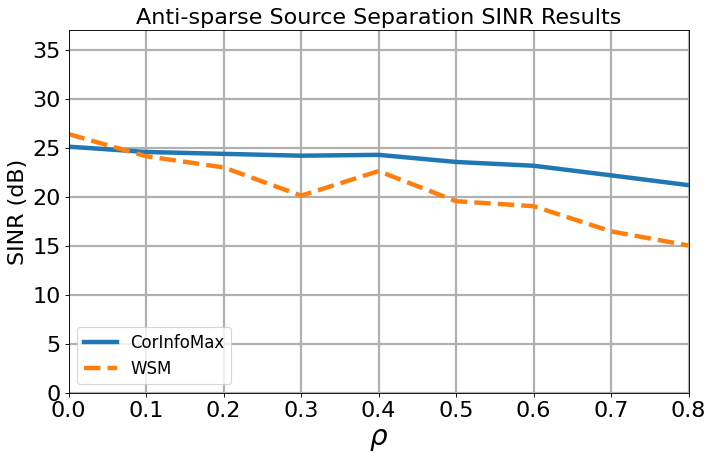

In [132]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
# plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
# plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
# plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
# plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
# plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [125]:
SINRWSM

27.71796920703516

In [126]:
WSM_INPUT_STD = 0.5
k = 74
a = df_anti_results.loc[(df_anti_results['Model'] == 'WSM') | ((df_anti_results['Model'] == 'CorInfoMax'))]
S = a.iloc[k]['S']
Xnoisy = a.iloc[k]['X']
rho = a.iloc[k]['rho']
print("rho : {}".format(rho))
XnoisyWSM = (WSM_INPUT_STD * (Xnoisy / Xnoisy.std(1)[:,np.newaxis]))
A = a.iloc[k]['A']
WfWSM = a.iloc[k+1]['Wf']
YWSM = WfWSM @ XnoisyWSM
evaluate_bss(WfWSM, YWSM, A, S, mean_normalize_estimations = False)

rho : 0.1


(9.660237380554944,
 array([20.30295808, 13.27594634, 21.56748081,  6.27555122,  5.8441303 ]),
 array([3.66897288, 2.46956922, 1.75568104, 1.61396944, 1.00967696]),
 array([[ 0.82516613,  0.64658696,  0.43575675, ..., -0.73562317,
          0.15793649, -0.96828452],
        [ 0.79857566,  0.7221331 ,  0.13723371, ..., -0.76103964,
          0.43712056, -1.05368445],
        [ 0.43889097, -0.71655969, -1.02106998, ..., -0.73411289,
         -0.3246314 ,  0.97455271],
        [-0.49830144,  0.49068111,  0.30182799, ..., -0.20174933,
         -0.29507268, -0.13404678],
        [ 0.4685896 ,  1.1229182 ,  0.62362741, ..., -0.16882061,
         -0.14840468, -0.52298371]]),
 array([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.]]))

In [127]:
evaluate_bssV2(WfWSM, YWSM, A, S, mean_normalize_estimations = False)

(4.5368156825105475,
 array([0.01873859, 0.03118492, 0.06151584, 6.27555122, 5.8441303 ]),
 array([3.66897288, 2.46956922, 1.75568104, 1.61396944, 1.00967696]),
 array([[ 0.03576506,  0.08570663,  0.04759831, ..., -0.01288522,
         -0.01132697, -0.03991669],
        [-0.0482661 ,  0.04752798,  0.02923543, ..., -0.01954169,
         -0.02858111, -0.01298394],
        [-0.09701975, -0.08773267, -0.01667266, ...,  0.09245946,
         -0.05310621,  0.12801317],
        [-0.49830144,  0.49068111,  0.30182799, ..., -0.20174933,
         -0.29507268, -0.13404678],
        [ 0.4685896 ,  1.1229182 ,  0.62362741, ..., -0.16882061,
         -0.14840468, -0.52298371]]),
 array([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.]]))

In [128]:
a.iloc[k+1]['SINR']

4.536815682510545

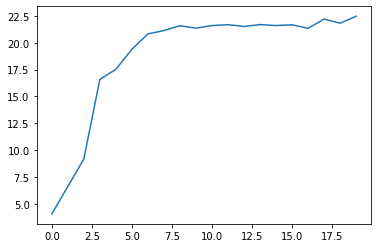

In [54]:
plt.plot(a.iloc[k+1]['SINRlist'])

In [12]:
S

rho                                                             0.1
trial                                                             0
seed                                                           6661
Model                                                    CorInfoMax
SINR                                                      25.929391
SINRlist          [-2.1287220493366905, 17.719365041484455, 24.4...
SNR               [26.577419459875852, 24.553424783626987, 26.56...
S                 [[0.2724520941962869, 0.7950779171294404, 0.36...
A                 [[-2.0106288563665626, -1.5912698479169127, -0...
X                 [[-0.5057418696710692, -3.7269992243626833, -2...
Wf                [[-0.20373120284535215, -0.20907847734859117, ...
SNRinp                                                    30.004276
execution_time                                            93.459601
Name: 8, dtype: object

In [5]:
df_anti_results.loc[(df_anti_results['Model'] == 'WSM') & (df_anti_results['rho'] == 0.6)]['SINR']

51      5.457883
123     5.495955
195     8.243128
267    16.746501
339     5.541344
411     5.441321
483     5.453452
555     7.630475
627    11.171664
699    12.047600
771     2.064882
51      8.399253
123     5.494646
195     5.198083
267    12.368429
339    11.853042
411     5.507466
483     8.458223
555     2.064371
627     5.373010
699     4.702717
771     8.497614
51     12.318332
123     5.470538
195    11.817440
267     2.025363
339     8.660638
411     8.508205
483     5.431618
555    12.324599
627     8.526831
699    -5.845041
771     2.037311
843     5.368733
915     5.294086
Name: SINR, dtype: float64